In [1]:
import keras
import matplotlib.pyplot as plt

In [4]:
nb_classes = 10  # 10 Digits de 0 à 9

# Dimensionen des images (28x28 pixel)
img_rows, img_cols = 28, 28

# charge image data et labels, séparation de test et train 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# reshape images en 4D tensor (N images, 28 lignes, 28 colonnes, 1 canal) 
# rescale pixels de [0, 255] vers [0, 1]
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
print('X_train shape: ', X_train.shape)
print(X_train.shape[0], "training samples")
print(X_test.shape[0], "test samples")

# convertion des labels (0-9) en "one-hot encoded binary vectors". 
#  
Y_train = keras.utils.to_categorical(y_train, nb_classes)
Y_test = keras.utils.to_categorical(y_test, nb_classes)
print("One-hot encoding: {}".format(Y_train[0, :]))

X_train shape:  (60000, 28, 28, 1)
60000 training samples
10000 test samples
One-hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


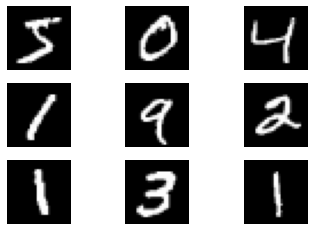

In [5]:
for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(X_train[i, :, :, 0], cmap='gray')
    plt.axis('off')

In [6]:
model = keras.Sequential()

# Conv2D(number_filters, kernel_size, input_shape=(number_channels, img_col), padding, activation)
model.add(keras.layers.Conv2D(6, (5, 5), input_shape=[img_rows, img_cols, 1], padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(16, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(120, (5, 5), activation='relu'))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(84, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [16]:
nb_epoch = 10 # nombre de passes pour chaque images d'entrainement
batch_size = 250 # taille du lot (Gradient)

model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, 
          verbose=1, validation_data=(X_test, Y_test))

score =  model.evaluate(X_test, Y_test, verbose=0)
print('Test score', score[0])
print('Test accuracy', score[1])

Epoch 1/10
240/240 [==============================] - 15s 62ms/step - loss: 2.0386 - accuracy: 0.3659 - val_loss: 1.9684 - val_accuracy: 0.6319
Epoch 2/10
240/240 [==============================] - 14s 60ms/step - loss: 2.0128 - accuracy: 0.3731 - val_loss: 1.9326 - val_accuracy: 0.6515
Epoch 3/10
240/240 [==============================] - 14s 58ms/step - loss: 1.9807 - accuracy: 0.3924 - val_loss: 1.8931 - val_accuracy: 0.6676
Epoch 4/10
240/240 [==============================] - 15s 61ms/step - loss: 1.9507 - accuracy: 0.4017 - val_loss: 1.8511 - val_accuracy: 0.6784
Epoch 5/10
240/240 [==============================] - 13s 56ms/step - loss: 1.9139 - accuracy: 0.4182 - val_loss: 1.8060 - val_accuracy: 0.6837
Epoch 6/10
240/240 [==============================] - 14s 58ms/step - loss: 1.8772 - accuracy: 0.4289 - val_loss: 1.7590 - val_accuracy: 0.6917
Epoch 7/10
240/240 [==============================] - 15s 61ms/step - loss: 1.8404 - accuracy: 0.4455 - val_loss: 1.7106 - val_accuracy:

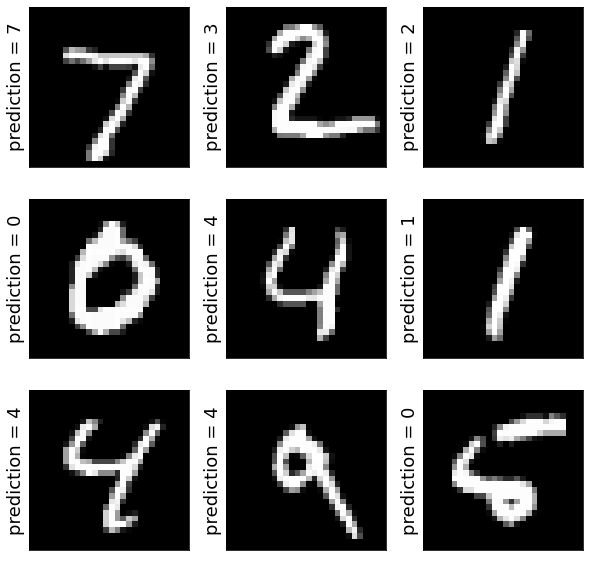

In [15]:
import numpy as np
#res = model.predict_classes(X_test[:9])
res= np.argmax(model.predict(X_test[:9]), axis=-1)
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel("prediction = {}".format(res[i]), fontsize=18)